<h2 align="center> Environmental Setup </h2>

In [ ]:
import sys

# ===============================
# Data Handling Libraries
# ===============================
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scipy

# ===============================
# Web Scraping & HTTP Libraries
# ===============================
!{sys.executable} -m pip install aiohttp
!{sys.executable} -m pip install beautifulsoup4
!{sys.executable} -m pip install lxml
!{sys.executable} -m pip install nest_asyncio
!{sys.executable} -m pip install selenium
!{sys.executable} -m pip install cloudscraper
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install selenium_stealth

# ===============================
# Machine Learning & NLP Libraries
# ===============================
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install spacy

# ===============================
# Data Visualization & Word Cloud
# ===============================
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install matplotlib

# ===============================
# Additional Utilities
# ===============================
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install emoji
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install contractions

In [1069]:
# ===============================
# Standard Python Libraries
# ===============================
import asyncio
import random
import re
import json
import os
import time
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from functools import lru_cache
import hashlib
import urllib.parse
import html

# ===============================
# Web Scraping & Automation Libraries
# ===============================
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from selenium_stealth import stealth
from bs4 import BeautifulSoup
import nest_asyncio

# ===============================
# Data Handling Libraries
# ===============================
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ===============================
# NLP and Text Processing Libraries
# ===============================
import nltk
from nltk.corpus import stopwords
import contractions
import emoji
import spacy

# ===============================
# Visualization Libraries
# ===============================
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# ===============================
# Concurrency & Threading
# ===============================
from concurrent.futures import ThreadPoolExecutor

# ===============================
# Machine Learning Libraries
# ===============================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# ===============================
# Sparse Matrix Handling Libraries
# ===============================
from scipy.sparse import hstack, lil_matrix

# ===============================
# Data Manipulation Libraries
# ===============================
import numpy as np
from collections import Counter
from sklearn.preprocessing import MaxAbsScaler

# ===============================
# Text Wrapping
# ===============================
import textwrap

In [513]:
# ===============================
# Single-Language Models Download
# ===============================
!{sys.executable} -m spacy download en_core_web_md
!{sys.executable} -m spacy download xx_sent_ud_sm

# ===============================
# Stopwords Download
# ===============================
nltk.download('stopwords')
nltk.download('punkt')

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.8.0/en_core_web_md-3.8.0-py3-none-any.whl (33.5 MB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('xx_sent_ud_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/perinban/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/perinban/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h2 align="center"> Creation of Helper Functions </h2>

In [ ]:
# ===============================
# Helper Function: write_json_file
# ===============================
def write_json_file(file_path, product_data):
    # Ensure the product data is a valid dictionary
    if not isinstance(product_data, dict):
        raise ValueError("Product data must be a dictionary.")

    # Check if the file exists
    if os.path.exists(file_path):
        try:
            # Read the existing content from the JSON file
            with open(file_path, "r", encoding="utf-8") as json_file:
                data = json.load(json_file)

                # Ensure data is always a list
                if isinstance(data, dict):  # If data is a dictionary, convert it to a list
                    data = [data]
                elif not isinstance(data, list):  # If neither list nor dict, reset to an empty list
                    data = []

        except (json.JSONDecodeError, FileNotFoundError):  # Handle missing or invalid files
            data = []
    else:
        # If the file does not exist, initialize an empty list
        data = []

    # Ensure product data is in the correct format (should be a dictionary)
    if isinstance(product_data, dict):
        # Append the new product data
        data.append(product_data)
    else:
        raise ValueError("The product data must be a dictionary.")

    # Write the updated data back to the JSON file
    with open(file_path, "w", encoding="utf-8") as json_file:
        json.dump(data, json_file, ensure_ascii=False, indent=4)
        
# ========================= Save Product Links to JSON =========================

# ===========================================
# Helper Function: save_product_links_to_json
# ===========================================

def save_product_links_to_json(new_links, link_path):
    # Try to load existing data from the JSON file
    try:
        with open(link_path, 'r') as file:
            existing_links = json.load(file)
    except FileNotFoundError:
        existing_links = []

    # Append new links to the existing list and remove duplicates
    unique_links = list(set(existing_links + new_links))

    # Write the updated list of links back to the JSON file
    with open(link_path, 'w') as file:
        json.dump(unique_links, file, indent=4)

    return unique_links

In [911]:
# ===============================================
# Helper Function: WebDriver Setup and Management
# ===============================================

# List of user agents for rotation
USER_AGENTS = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36",
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Edge/115.0.1901.183",
]

# WebDriver Cache
_driver = None

# ========================= Singleton WebDriver Setup =========================
def get_driver():
    global _driver
    if _driver is None:
        print("Initializing new WebDriver...")
        driver_path = '/Users/perinban/Downloads/chromedriver-mac-arm64/chromedriver'
        service = Service(driver_path)
        options = Options()
        options.add_argument("--headless")
        options.add_argument("--disable-blink-features=AutomationControlled")
        options.add_argument("--incognito")
        options.add_argument("--disable-gpu")
        options.add_argument("--no-sandbox")
        options.add_argument("--disable-dev-shm-usage")
        options.add_argument(f"user-agent={random.choice(USER_AGENTS)}")
        _driver = webdriver.Chrome(service=service, options=options)

        # Apply stealth settings to evade browser fingerprinting
        stealth(
            _driver,
            languages=["en-US", "en"],
            vendor="Google Inc.",
            platform="Win32",
            webgl_vendor="Intel Inc.",
            renderer="Intel Iris OpenGL Engine",
            fix_hairline=True,
        )

    return _driver

# ========================= Safe WebDriver Shutdown =========================
async def close_driver():
    global _driver
    if _driver is not None:
        print("Closing WebDriver...")
        _driver.quit()
        _driver = None

<h2 align="center"> Scrap real-time data from Flipkart </h2>

In [ ]:
# ========================= Extract Product Links =========================

# Apply nest_asyncio for Jupyter Notebook compatibility
nest_asyncio.apply()

link_path = 'product_links.json'

def extract_product_links(html):
    soup = BeautifulSoup(html, 'html.parser')  # Convert page source into BeautifulSoup object

    # Create a dictionary to store product links with corresponding data-tkid
    product_links = {}

    # Find all div tags with 'data-tkid' attribute
    for div in soup.find_all('div', attrs={'data-tkid': True}):
        data_tkid = div.get('data-tkid')  # Extract the 'data-tkid' attribute value
        link_tag = div.find('a', attrs={'target': '_blank', 'rel': 'noopener noreferrer'})

        if link_tag and data_tkid:
            product_links[data_tkid] = link_tag.get('href')

    return product_links

# ========================= Transform Product Links =========================
def transform_product_links(product_links):
    transformed_links = {}

    for data_tkid, url in product_links.items():
        # Extract the required part of the URL (cutting at '&otracker=search')
        base_url = url.split("&otracker=search")[0] + "&otracker=search"

        # Add '&fm=organic'
        base_url += "&fm=organic"

        # Clean up the key by removing '=='
        cleaned_tkid = data_tkid.rstrip("=")

        # Extract everything after '&iid=' in the original URL
        remaining_part = url.split("&iid=")[-1]

        # Find the first '%' after 'iid' value and take everything from there
        percent_index = remaining_part.find('%')
        if percent_index != -1:
            remaining_part = remaining_part[percent_index:]  # Keep everything from the first '%'

        # Construct the transformed URL
        new_url = f"https://flipkart.com{base_url}&iid={cleaned_tkid}{remaining_part}"

        transformed_links[data_tkid] = new_url

    return transformed_links

# ========================= Scrape Products with Pagination =========================
async def scrape_products(search_query, driver):
    print(f"Scraping products for {search_query}...")
    all_links = {}
    page = 1

    while True:
        print(f"Scraping page {page} for {search_query}...")
        try:
            driver.get(f"https://www.flipkart.com/search?q={search_query}&page={page}")
            await asyncio.sleep(random.uniform(2, 5))  # Async sleep to avoid blocking event loop

            product_links = extract_product_links(driver.page_source)
            all_links.update(product_links)

            # Check if there is a "Next" page link
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            next_page = soup.find('a', string=re.compile("Next"))

            if not next_page:
                break

            page += 1
        except Exception as e:
            print(f"Error scraping page {page} for {search_query}: {e}")
            break

    transformed_links = transform_product_links(all_links)
    print(f"Found {len(transformed_links)} transformed product links for {search_query}")
    return transformed_links

# ========================= Execute Scraping in Parallel =========================
async def main():
    search_queries = ['laptop', 'mobile', 'watch', 'television', 'tools']
    driver = get_driver()

    try:
        tasks = [scrape_products(query, driver) for query in search_queries]
        results = await asyncio.gather(*tasks)

        # Flatten the results into a single list of URLs
        product_urls = [url for result in results for url in result.values()]

        # Save the unique links to the JSON file
        unique_links = save_product_links_to_json(product_urls, link_path)
        print(f"Total unique links saved: {len(unique_links)}")
    except Exception as e:
        print(f"Error during scraping: {e}")
    finally:
        driver.quit()

    return unique_links

# Run the async function
if __name__ == "__main__":
    product_urls = asyncio.run(main())

In [ ]:
# ==========================================
# Web Scraping with Asynchronous Concurrency
# ==========================================

# Apply nest_asyncio for Jupyter Notebook compatibility
nest_asyncio.apply()
        
file_path = "product_data.json"        

# Rate limiting settings
MAX_CONCURRENT_REQUESTS = 5  # Number of concurrent requests
REQUEST_DELAY = 1  # Reduced delay between requests in seconds
TIMEOUT = 7
MAX_PAGES = 5

# Semaphore for rate limiting
semaphore = asyncio.Semaphore(MAX_CONCURRENT_REQUESTS)

# ========================= Function to Construct Review URL =========================
def construct_review_url(url, page=1):
    base_url = url.split("/p")[0]
    query_params = urllib.parse.parse_qs(urllib.parse.urlparse(url).query)
    product_id = query_params["pid"][0]
    lid = query_params["lid"][0]
    new_url = f"{base_url}/product-reviews/{product_id}?pid={product_id}&lid={lid}&marketplace=FLIPKART&page={page}"
    return new_url

# ========================= Function to Extract Reviews from a Single Page =========================
async def extract_reviews_page(url, driver):
    reviews = []
    try:
        driver.get(url)

        # Wait for reviews to load
        WebDriverWait(driver, TIMEOUT).until(EC.presence_of_element_located((By.CLASS_NAME, 'col')))

        # Find the review container
        cols_div = driver.find_elements(By.CLASS_NAME, 'col')

        if len(cols_div) <= 1:
            return reviews

        # Extract reviews
        for col in cols_div[1:]:
            row_divs = col.find_elements(By.CLASS_NAME, 'row')

            customer, rating, summary, feedback, location, date = (None,) * 6

            for index, row in enumerate(row_divs):
                try:
                    if index == 0:
                        rating_div = row.find_element(By.XPATH, ".//div[not(@class='img')]")
                        rating = rating_div.get_attribute('textContent').strip()
                        p_div = row.find_element(By.XPATH, ".//p")
                        summary = p_div.get_attribute('textContent').strip()
                    elif index == 1:
                        empty_div = row.find_element(By.CSS_SELECTOR, "div[class='']")
                        feedback = empty_div.get_attribute('textContent').strip()
                    elif index == 2:
                        p_divs = row.find_elements(By.XPATH, ".//p")
                        for i, div in enumerate(p_divs):
                            if i == 0:
                                customer = div.get_attribute('textContent').strip()
                            elif i == 1:
                                spans = div.find_elements(By.TAG_NAME, "span")
                                last_span = spans[-1].get_attribute('textContent').strip()
                                location = last_span.strip(", ").strip()
                            else:
                                date = div.get_attribute('textContent').strip()
                except NoSuchElementException:
                    continue

            if customer and rating and summary and feedback and location and date:
                reviews.append({
                    'name': customer,
                    'rating': rating,
                    'summary': summary,
                    'feedback': feedback,
                    'location': location,
                    'date': date
                })

    except Exception:
        pass

    return reviews

# ========================= Function to Extract All Reviews =========================
async def extract_all_reviews(base_url, max_pages):
    all_reviews = []

    # Generate all review page URLs
    review_urls = [construct_review_url(base_url, page) for page in range(1, max_pages + 1)]

    # Create multiple browser instances for parallel scraping
    drivers = [get_driver() for _ in range(MAX_CONCURRENT_REQUESTS)]

    # Scrape reviews from all pages in parallel
    tasks = []
    for i, url in enumerate(review_urls):
        driver = drivers[i % MAX_CONCURRENT_REQUESTS]  # Assign a driver to each task
        tasks.append(extract_reviews_page(url, driver))

    results = await asyncio.gather(*tasks)

    # Combine results from all pages
    for page_reviews in results:
        all_reviews.extend(page_reviews)

    return all_reviews

# ========================= Scraping Function =========================
async def scrape_flipkart(url):

    async with semaphore:
        product_data = {}

        driver = get_driver()

        try:
            # Rotate user-agent
            user_agent = random.choice(USER_AGENTS)
            driver.execute_cdp_cmd('Network.setUserAgentOverride', {"userAgent": user_agent})

            # Introduce a delay between requests
            await asyncio.sleep(random.uniform(1, 5))

            # Navigate to the webpage
            driver.get(url)

            # Wait for the page to load and the H1 tag with product title to appear
            WebDriverWait(driver, TIMEOUT).until(EC.presence_of_element_located((By.TAG_NAME, "h1")))

            # Extract Product Title
            h1_tag = driver.find_element(By.TAG_NAME, "h1")
            span_tags = h1_tag.find_elements(By.TAG_NAME, "span")
            title = span_tags[1].text if len(span_tags) > 1 else span_tags[0].text
            product_data['product_name'] = title

            # Extract Product Rating
            try:
                span_tag = driver.find_element(By.XPATH, "//span[starts-with(@id, 'productRating')]")
                rating_div = span_tag.find_element(By.XPATH, ".//div")
                rating = rating_div.text.strip()
                product_data['product_rating'] = rating
            except NoSuchElementException:
                product_data['product_rating'] = None

            # Extract Price
            try:
                price_div = driver.find_element(By.XPATH, "//div[contains(text(), '₹')]")
                price = price_div.text.strip()
                product_data['price'] = price
            except NoSuchElementException:
                product_data['price'] = None

            # Extract EMI and Next Price if available
            if "/" in product_data.get('price', ''):
                try:
                    emi_div = driver.find_element(By.XPATH, "//div[contains(text(), 'EMI')]")
                    emi_text = emi_div.text.strip()
                    product_data['emi_plan'] = emi_text
                except Exception:
                    product_data['emi_plan'] = None

                try:
                    next_price_div = driver.find_element(By.XPATH, "(//div[contains(text(), '₹')])[2]")
                    next_price = next_price_div.text.strip()
                    product_data['next_price'] = next_price
                except Exception:
                    product_data['next_price'] = None
            else:
                product_data['emi_plan'] = None
                product_data['next_price'] = None

            # Extract Highlights
            highlights = []
            try:
                highlights_div = driver.find_element(By.XPATH, "//div[contains(text(), 'Highlights')]")
                parent_div = highlights_div.find_element(By.XPATH, "ancestor::div[1]")
                ul_tags = parent_div.find_elements(By.XPATH, ".//ul")

                for ul_tag in ul_tags:
                    li_tags = ul_tag.find_elements(By.TAG_NAME, "li")
                    for li in li_tags:
                        highlights.append(li.text)
                product_data['highlights'] = highlights
            except Exception:
                product_data['highlights'] = []

            # Extract Seller Information
            try:
                seller_div = driver.find_element(By.XPATH, "//div[span[text()='Seller']]")
                parent_div = seller_div.find_element(By.XPATH, "ancestor::div[1]")
                seller_name_div = parent_div.find_element(By.XPATH, ".//div[@id='sellerName']")
                seller_name = seller_name_div.find_element(By.XPATH, ".//span/span").text
                seller_rating = seller_name_div.find_element(By.XPATH, ".//div").text.strip()
                product_data['seller_name'] = seller_name
                product_data['seller_rating'] = seller_rating
            except Exception:
                product_data['seller_name'] = None
                product_data['seller_rating'] = None

            # Extract Specifications
            product_specifications = {}
            try:
                specifications_div = driver.find_element(By.XPATH, "//div[div[text()='Specifications']]")
                parent_div = specifications_div.find_element(By.XPATH, "ancestor::div[1]")
                tables = parent_div.find_elements(By.TAG_NAME, "table")

                for table in tables:
                    group_section_div = table.find_element(By.XPATH, "../div[1]")
                    section_heading = group_section_div.get_attribute('textContent').strip()
                    product_specifications[section_heading] = {}

                    rows = table.find_elements(By.TAG_NAME, "tr")
                    for row in rows:
                        cells = row.find_elements(By.TAG_NAME, "td")
                        if len(cells) >= 2:
                            attribute = cells[0].get_attribute('textContent').strip()
                            value = cells[1].get_attribute('textContent').strip()
                            product_specifications[section_heading][attribute] = value
            except Exception:
                product_specifications = None

            if product_specifications:
                product_data['product_specifications'] = product_specifications
            else:
                product_data['product_specifications'] = None

            # Extract Reviews using the constructed review URL
            review_url = construct_review_url(url)
            product_data['reviews'] = await extract_all_reviews(review_url, MAX_PAGES)
                
            write_json_file(file_path, product_data)

        except Exception:
            pass

        finally:
            await close_driver()

        return product_data

# ========================= Main Execution =========================
async def main(urls):
    semaphore = asyncio.Semaphore(1)  # Allow only MAX_PAGES tasks at a time

    async def bounded_scrape(url):
        async with semaphore:  # Ensures only MAX_PAGES tasks run at the same time
            return await scrape_flipkart(url)

    tasks = [bounded_scrape(url) for url in urls]  # Create limited concurrency tasks
    results = await asyncio.gather(*tasks)  # Run tasks with limit
    return results

# Running the scraping function
if __name__ == "__main__":
    product_data = asyncio.run(main(product_urls))

In [929]:
# ================================
# Faster Data Loading from JSON File
# ================================

"""
file_name = "product_data.json"

# Open the JSON file and load the data
with open(file_name, "r") as json_file:
    product_data = json.load(json_file)

"""

'\nfile_name = "product_data.json"\n\n# Open the JSON file and load the data\nwith open(file_name, "r") as json_file:\n    product_data = json.load(json_file)\n\n'

<h2 align="center"> Data Wrangling </h2>

In [930]:
# =====================================
# Process and Structure Product Data
# =====================================

# Initialize lists to hold product and review data
product_info_list = []

# Initialize a counter for generating product_id numbers
product_id_counter = 1

# Loop through each item in product_data and process product columns
for item in product_data:
    # Extract product information
    product_info = {key: value for key, value in item.items() if key != 'reviews'}

    # Assign a numeric product_id (starting from 1)
    product_id = product_id_counter

    # Increment the product_id_counter for the next product
    product_id_counter += 1

    # Add product information to product_info_list
    product_info['product_id'] = product_id  # Add numeric product identifier
    product_info_list.append(product_info)

# Convert product data to DataFrame
productData = pd.DataFrame(product_info_list)

In [931]:
# =====================================
# Validate Product Data
# =====================================

#Validate Product Data
productData.head()

,product_name,product_rating,price,emi_plan,next_price,highlights,seller_name,seller_rating,product_specifications,product_id
0,2023 Edition Analog Watch - For Women VH000007G,4.6,"₹1,309",None,None,[],RetailNet,4.7,None,1
1,2023 Edition Analog Watch - For Men PE000017P,4.3,"₹1,399",None,None,[],RetailNet,4.7,None,2
2,Reliance 109 cm (43 inch) Full HD LED Smart Go...,4,"₹21,499",None,None,[Supported Apps: Netflix|Prime Video|Disney+Ho...,MINERVASPACE,3.6,"{'General': {'In The Box': '1 TV Unit, Remote,...",3
3,TIMEWEAR Silver Pink Dial Stainless Steel Stra...,4.2,₹299,None,None,[],TIMEWEAR AND BEYOND,3.5,None,4
4,2023 Edition Analog Watch - For Women VH000008G,4.4,"₹1,189",None,None,[],RetailNet,4.7,None,5


In [932]:
# =====================================
# Process and Store Product Reviews
# =====================================

# Initialize list to hold review data
review_info_list = []

# Loop through each item in product_data and process reviews
for product_info, item in zip(product_info_list, product_data):
    # Extract product_id from the current product_info
    product_id = product_info['product_id']

    # Extract reviews and create a list of reviews with references to product_id
    reviews = item.get('reviews', {})

    for review in reviews:
        review_info = {
            'product_id': product_id,  # Link review to product
            'customer_name': review.get('name', None),
            'customer_rating': review.get('rating', None),
            'customer_summary': review.get('summary', None),
            'customer_feedback': review.get('feedback', None),
            'customer_location': review.get('location', None),
            'customer_review_date': review.get('date', None),
        }
        review_info_list.append(review_info)

# Convert review data to DataFrame
reviewData = pd.DataFrame(review_info_list)

In [933]:
# =====================================
# Validate Customer Review Data
# =====================================

#Validate Customer Review Data
reviewData.head()

,product_id,customer_name,customer_rating,customer_summary,customer_feedback,customer_location,customer_review_date
0,3,pardeep kudyar,3,Just okay,Not as expected,Jammu,1 month ago
1,3,pardeep kudyar,3,Just okay,Not as expected,Jammu,1 month ago
2,3,Suresh G Yadav,5,Must buy!,l overall good,Surat,1 month ago
3,3,Suresh G Yadav,5,Must buy!,l overall good,Surat,1 month ago
4,3,RAJA R,5,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,16 days ago


In [934]:
# ========================= Check the Number of Rows and Columns =========================

# Check the number of rows and columns
print("Product Data: ", productData.shape)
print("Review Data: ", reviewData.shape)

Product Data:  (2592, 10)
Review Data:  (113422, 7)


In [935]:
# ========================= Check the DataFrame Details =========================

# Check the DataFrame details
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_name            2592 non-null   object
 1   product_rating          2525 non-null   object
 2   price                   2592 non-null   object
 3   emi_plan                518 non-null    object
 4   next_price              518 non-null    object
 5   highlights              2592 non-null   object
 6   seller_name             2591 non-null   object
 7   seller_rating           2591 non-null   object
 8   product_specifications  1799 non-null   object
 9   product_id              2592 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 202.6+ KB


In [936]:
# ========================= Save Product and Review Data to Excel Files =========================

productData.to_excel('Source Product Data.xlsx', index=False)
productData.to_excel('Source Review Data.xlsx', index=False)

In [937]:
# ========================= Check the DataFrame Details =========================

# Check the DataFrame details
reviewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113422 entries, 0 to 113421
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            113422 non-null  int64 
 1   customer_name         113422 non-null  object
 2   customer_rating       113422 non-null  object
 3   customer_summary      113422 non-null  object
 4   customer_feedback     113422 non-null  object
 5   customer_location     113422 non-null  object
 6   customer_review_date  113422 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.1+ MB


In [938]:
# ========================= Convert Column Names to Uppercase for Consistency =========================

#Convert Column Name to UpperCase to make it in common case

def convert_columns_to_uppercase(data):
    # Convert Column Name to UpperCase
    data.columns = data.columns.str.upper()
    return data

productData = convert_columns_to_uppercase(productData)
reviewData = convert_columns_to_uppercase(reviewData)

In [ ]:
# ========================= Data Cleaning & Trimming =========================

def trim_object_columns(data):
    # Trim Additional Spaces in All Object columns
    data = data.apply(lambda x: x.str.strip() if isinstance(x, str) else x, axis=1)
    return data

# Trim Additional Spaces in All Object columns
productData = trim_object_columns(productData)
reviewData = trim_object_columns(reviewData)

In [940]:
# ========================= Rename Columns =========================

productData = productData.rename(columns={'PRICE': 'EMI_PRICE', 'NEXT_PRICE': 'PRODUCT_COST'})

In [941]:
# ========================= Handling Final Price =========================

productData['PRODUCT_COST'] = productData['PRODUCT_COST'].fillna(productData['EMI_PRICE'])

In [942]:
# ========================= Price Handling and Cleaning for Product Data =========================

# Function to clean price format
def clean_price(price):
    if isinstance(price, str):
        return float(price.replace('₹', '').replace(',', '').strip())
    return price

productData['PRODUCT_COST'] = productData['PRODUCT_COST'].apply(clean_price)

In [943]:
# ========================= Timestamp Conversion =========================

# Global reference time (using current timestamp or any common time you prefer)
common_time = datetime.now()

# Month mapping
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

# Convert Relative Time to Absolute Timestamps
def extract_and_convert_to_timestamp(last_updated):
    # Handle "Today" string
    if isinstance(last_updated, str) and last_updated.lower() == "today":
        return common_time  # Return the current timestamp
    
    # If it's in the format "Month, Year"
    if isinstance(last_updated, str) and ',' in last_updated:
        try:
            month_str, year_str = last_updated.split(',')
            month = month_mapping.get(month_str.strip(), None)
            year = int(year_str.strip())
            if month:
                return datetime(year, month, 1)  # Return the first day of the month
        except Exception as e:
            print(f"Error parsing date: {e}")
            return None

    # If it's a relative time string like "3 days ago"
    match = re.search(
        r'(\d+)\s+(seconds?|minutes?|hours?|days?|weeks?|months?)\s*(?:ago|prior)?',
        str(last_updated))

    if match:
        # Extract the number and time unit
        time_ago = int(match.group(1))
        unit = match.group(2)

        # Handle time units for English
        if "second" in unit:
            return common_time - timedelta(seconds=time_ago)
        elif "minute" in unit:
            return common_time - timedelta(minutes=time_ago)
        elif "hour" in unit:
            return common_time - timedelta(hours=time_ago)
        elif "day" in unit:
            return common_time - timedelta(days=time_ago)
        elif "week" in unit:
            return common_time - timedelta(weeks=time_ago)
        elif "month" in unit:
            return common_time - relativedelta(months=time_ago)

    return None  # If no match, return None

# Apply the function to the 'CUSTOMER_REVIEW_DATE' column
reviewData['CUSTOMER_REVIEW_DATE'] = reviewData['CUSTOMER_REVIEW_DATE'].apply(extract_and_convert_to_timestamp)

In [944]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData.head()

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE
0,3,pardeep kudyar,3,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048
1,3,pardeep kudyar,3,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048
2,3,Suresh G Yadav,5,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048
3,3,Suresh G Yadav,5,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048
4,3,RAJA R,5,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048


In [945]:
# ========================= Reject Data Initialization =========================

def initialize_reject_data():
    # Initialize variables for storing rejects
    reject = []
    rejected_rows = pd.DataFrame()
    return reject, rejected_rows

# Initialize variables for storing rejects
productDataReject, productData_rejected = initialize_reject_data()
reviewDataReject, reviewData_rejected = initialize_reject_data()

In [946]:
# ========================= Null Value Handling =========================

def handle_null_values(data, reject, rejected_rows, columns_to_check):

    # Null Condition Check in required columns
    for col in columns_to_check:
        null_chk = data[col].isna() | (data[col] == '')

        # Drop the record if null found in mandatory columns
        if null_chk.any():
            rejected_rows = data[null_chk].copy()
            rejected_rows['REJECT_REASON'] = f"Null/Blank found for {col}"
            reject.append(rejected_rows)
            data.drop(rejected_rows.index, inplace=True)
    
    return data

# Product Data
productMandateCol = ['PRODUCT_ID', 'PRODUCT_NAME', 'PRODUCT_RATING', 'PRODUCT_COST', 'SELLER_NAME', 'SELLER_RATING']
productData = handle_null_values(productData, productDataReject, productData_rejected, productMandateCol)

# Review Data
reviewMandateCol = ['PRODUCT_ID', 'CUSTOMER_NAME', 'CUSTOMER_RATING', 'CUSTOMER_SUMMARY', 'CUSTOMER_FEEDBACK', 'CUSTOMER_LOCATION', 'CUSTOMER_REVIEW_DATE']
reviewData = handle_null_values(reviewData, reviewDataReject, reviewData_rejected, reviewMandateCol)

In [947]:
# ========================= Handle Duplicates in Data =========================

def handle_duplicates(data, reject, columns_to_check=None):

    # Function to hash dicts and lists while keeping their structure intact
    def hash_object(x):
        if isinstance(x, dict) or isinstance(x, list):
            return hashlib.md5(json.dumps(x, sort_keys=True).encode('utf-8')).hexdigest()
        return x
    
    # Make a copy of the original data
    data_hashed = data.copy()

    # If columns to check are not provided, check all columns
    if columns_to_check is None:
        columns_to_check = [col for col in data_hashed.columns]
    
    # Hash values in the selected columns
    for col in columns_to_check:
        data_hashed[col] = data_hashed[col].map(hash_object)

    # Check for duplicates only in the selected columns
    dup_df = data_hashed.duplicated(subset=columns_to_check, keep='first')

    # Store duplicate records in a separate DataFrame
    rejected_rows = data[dup_df].copy()
    rejected_rows['REJECT_REASON'] = "Duplicate Data found"
    reject.append(rejected_rows)

    # Remove duplicate rows from the original DataFrame
    data.drop(rejected_rows.index, inplace=True)
    data.reset_index(drop=True, inplace=True)
    
    return data

productData = handle_duplicates(productData, productDataReject)
reviewData = handle_duplicates(reviewData, reviewDataReject)

In [948]:
# ========================= Handle Non-Numeric Values in Data =========================

def handle_non_numeric_values(data, reject, column_names):
    # Create a mask for rows with non-numeric values in the specified columns
    non_numeric_mask = data[column_names].apply(pd.to_numeric, errors='coerce').isnull().any(axis=1)

    # Store rejected rows in a separate DataFrame
    rejected_rows = data[non_numeric_mask].copy()

    # Identify which columns have non-numeric values for each row
    reject_reasons = []
    for col in column_names:
        non_numeric_in_col = data[col].apply(pd.to_numeric, errors='coerce').isnull()
        reject_reasons.append(non_numeric_in_col)

    # Generate reject reasons for each row
    rejected_rows['REJECT_REASON'] = ''
    for index, row in rejected_rows.iterrows():
        reasons = []
        for col, mask in zip(column_names, reject_reasons):
            if mask[index]:
                reasons.append(f"Non-numeric value found for {col} data")
        rejected_rows.at[index, 'REJECT_REASON'] = ', '.join(reasons)

    # Append rejected rows to the reject list
    reject.append(rejected_rows)

    # Remove rejected rows from the original DataFrame
    data = data[~non_numeric_mask].reset_index(drop=True)
    data[column_names] = data[column_names].apply(pd.to_numeric, errors='coerce')

    return data

# Example usage
prod_cols = ['PRODUCT_RATING', 'SELLER_RATING', 'PRODUCT_COST']
rev_cols = ['CUSTOMER_RATING']

productData = handle_non_numeric_values(productData, productDataReject, prod_cols)
reviewData = handle_non_numeric_values(reviewData, reviewDataReject, rev_cols)

In [949]:
# ========================= Check for Missing Product IDs in Data =========================

def chk_product_id(productData, reviewData, productDataReject, reviewDataReject, chk_reviews):
 
    if chk_reviews:
        # Find product_ids that are present in productData but not in reviewData
        missing_in_reviews = productData[~productData['PRODUCT_ID'].isin(reviewData['PRODUCT_ID'])].copy()
        
        if not missing_in_reviews.empty:
            missing_in_reviews['REJECT_REASON'] = 'Missing from reviewData'
            productDataReject.append(missing_in_reviews)
        
        # Remove the rejected rows from productData
        productData = productData[productData['PRODUCT_ID'].isin(reviewData['PRODUCT_ID'])]
    else:
        # Find product_ids that are present in reviewData but not in productData
        missing_in_product = reviewData[~reviewData['PRODUCT_ID'].isin(productData['PRODUCT_ID'])].copy()
        
        if not missing_in_product.empty:
            missing_in_product['REJECT_REASON'] = 'Missing from productData'
            reviewDataReject.append(missing_in_product)
        
        # Remove the rejected rows from reviewData
        reviewData = reviewData[reviewData['PRODUCT_ID'].isin(productData['PRODUCT_ID'])]
    
    return productData, reviewData

productData, reviewData = chk_product_id(productData, reviewData, productDataReject, reviewDataReject, chk_reviews=False)

In [950]:
# ========================= Concatenate and Analyze Product Rejected Data =========================

# Concatenate all rejected DataFrames into a single DataFrame
if productDataReject:
    productDataRejects = pd.concat(productDataReject).reset_index(drop=True)
    
    # Group by the 'REJECT_REASON' column and get the count of records for each reason
    print(productDataRejects.groupby('REJECT_REASON').size().reset_index(name='count'))
else:
    productDataRejects = pd.DataFrame()

                                    REJECT_REASON  count
0  Non-numeric value found for SELLER_RATING data     36
1             Null/Blank found for PRODUCT_RATING     67
2                Null/Blank found for SELLER_NAME      1


In [951]:
# ========================= Concatenate and Analyze Review Rejected Data =========================

# Concatenate all rejected DataFrames into a single DataFrame
if reviewDataReject:
    reviewDataRejects = pd.concat(reviewDataReject).reset_index(drop=True)
    
    # Group by the 'REJECT_REASON' column and get the count of records for each reason
    print(reviewDataRejects.groupby('REJECT_REASON').size().reset_index(name='count'))
else:
    reviewDataRejects = pd.DataFrame()

              REJECT_REASON  count
0      Duplicate Data found  56739
1  Missing from productData    581


In [952]:
# ========================= Save Cleaned Data to Excel Files =========================

# Write Cleaned DataFrame to File
productData.to_excel('Product Data.xlsx', index=False)
reviewData.to_excel('Review Data.xlsx', index=False)

<h2 align="center"> Model Target Preparation </h2>

In [953]:
# ========================= Handling Final Rating as FallBack Mechanism =========================

# Identify the PRODUCT_IDs that are in productData but not in reviewData
missing_product_ids = set(productData['PRODUCT_ID']) - set(reviewData['PRODUCT_ID'])

# For the products missing from reviewData, create new rows and fill FINAL_RATING with PRODUCT_RATING
missing_data = productData[productData['PRODUCT_ID'].isin(missing_product_ids)].copy()

# Add these missing products to reviewData with the PRODUCT_RATING as FINAL_RATING
missing_data['FINAL_RATING'] = missing_data['PRODUCT_RATING']
missing_data['CUSTOMER_SUMMARY'] = 'No Review'
missing_data['CUSTOMER_FEEDBACK'] = 'No Review'

# Add these new rows to reviewData
reviewData = pd.concat([reviewData, missing_data[['PRODUCT_ID', 'FINAL_RATING', 'CUSTOMER_SUMMARY', 'CUSTOMER_FEEDBACK']]])

# For products in reviewData that have existing customer ratings, fill FINAL_RATING as usual
reviewData['FINAL_RATING'] = reviewData['CUSTOMER_RATING']
reviewData.loc[reviewData['CUSTOMER_RATING'].isna(), 'FINAL_RATING'] = reviewData.loc[reviewData['CUSTOMER_RATING'].isna(), 'PRODUCT_ID'].map(productData.set_index('PRODUCT_ID')['PRODUCT_RATING'])

In [954]:
# ========================= Sentiment Conversion Based on Rating =========================

# Proceed with sentiment conversion and assignment
def convert_rating_to_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'
    
# Sentiment
reviewData['SENTIMENT'] = reviewData['FINAL_RATING'].apply(convert_rating_to_sentiment)

In [955]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,neutral
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,positive
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,positive
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,neutral
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative
...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive


In [956]:
# ========================= Encode Sentiment as Numeric Labels =========================

# Encode sentiment as numeric labels

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reviewData['SENTIMENT'])

<h2 align="center"> Model Feature Prepartion </h2>

In [957]:
# ========================= Combine Customer Feedback and Summary =========================

# Concatenate CUSTOMER_FEEDBACK and CUSTOMER_SUMMARY into one column
reviewData['COMBINED_FEEDBACK'] = reviewData['CUSTOMER_FEEDBACK'] + " " + reviewData['CUSTOMER_SUMMARY']

In [958]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT,COMBINED_FEEDBACK
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,neutral,Not as expected Just okay
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,positive,l overall good Must buy!
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,positive,"Good Quality and 1080 Pixel, Q Led, 8GB Memory..."
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,neutral,Sounds not good Fair
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative,Not good t Terrible product
...,...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive,No Review No Review
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive,No Review No Review
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review


In [959]:
# ===================================================
# Customer Review Text Preprocessing and Normalization
# ====================================================

def replace_smileys_with_text(text):
    """
    Replaces text-based emoticons (e.g., :), :(, :D) with their text representations.
    """
    # Replace smileys/emoticons with text representation
    text = re.sub(r':\(|:\'(\(|\))', 'sad face', text)  # :( or :'( to "sad face"
    text = re.sub(r':\)|:\'\)', 'happy face', text)  # :) or :') to "happy face"
    text = re.sub(r':D|:d', 'big smile', text, flags=re.IGNORECASE)  # :D or :d to "big smile"
    text = re.sub(r';\)', 'wink', text)  # ;) to "wink"
    text = re.sub(r':P|:p', 'playful', text, flags=re.IGNORECASE)  # :P or :p to "playful"
    text = re.sub(r'XD|xD', 'laughing hard', text, flags=re.IGNORECASE)  # XD or xD to "laughing hard"
    text = re.sub(r':o|:O', 'surprised', text)  # :o or :O to "surprised"
    text = re.sub(r':\|', 'neutral face', text)  # :| to "neutral face"
    text = re.sub(r':/', 'skeptical', text)  # :/ to "skeptical"
    text = re.sub(r':\\', 'unsure', text)  # :\ to "unsure"
    text = re.sub(r':3', 'cat face', text)  # :3 to "cat face"
    text = re.sub(r'>:\(', 'angry face', text)  # >:( to "angry face"
    
    return text

def replace_smileys_with_text(text):
    """
    Replaces text-based emoticons (e.g., :), :(, :D) with their text representations.
    """
    # Replace smileys/emoticons with text representation
    text = re.sub(r':\(|:\'(\(|\))', 'sad face', text)  # :( or :'( to "sad face"
    text = re.sub(r':\)|:\'\)', 'happy face', text)  # :) or :') to "happy face"
    text = re.sub(r':D|:d', 'big smile', text, flags=re.IGNORECASE)  # :D or :d to "big smile"
    text = re.sub(r';\)', 'wink', text)  # ;) to "wink"
    text = re.sub(r':P|:p', 'playful', text, flags=re.IGNORECASE)  # :P or :p to "playful"
    text = re.sub(r'XD|xD', 'laughing hard', text, flags=re.IGNORECASE)  # XD or xD to "laughing hard"
    text = re.sub(r':o|:O', 'surprised', text)  # :o or :O to "surprised"
    text = re.sub(r':\|', 'neutral face', text)  # :| to "neutral face"
    text = re.sub(r':/', 'skeptical', text)  # :/ to "skeptical"
    text = re.sub(r':\\', 'unsure', text)  # :\ to "unsure"
    text = re.sub(r':3', 'cat face', text)  # :3 to "cat face"
    text = re.sub(r'>:\(', 'angry face', text)  # >:( to "angry face"
    
    return text

def normalize_text(text):
    """ Clean and normalize text reviews while maintaining structure and sentiment. """
    if not isinstance(text, str) or not text.strip():
        return text

    # Decode HTML entities and remove URLs, hashtags, mentions in one step
    text = html.unescape(text)
    text = re.sub(r'https?://\S+|www\.\S+', ' [URL] ', text)  # Remove URLs
    text = re.sub(r'#\w+|@\w+', '', text)  # Remove hashtags and mentions

    # Combine transformations
    text = re.sub(r'(\d+)/(\d+)', r'\1 over \2', text)  # Convert fractions
    text = re.sub(r'%', ' ', text)  # Remove percentage symbol
    text = re.sub(r'\$+', ' ', text)  # Remove sequences like $$$$$
    
    # Replace emojis with their textual representation using emoji.demojize()
    text = emoji.demojize(text)

    # Add spaces around emojis (e.g., "thumbs_upthumbs_up" -> " thumbs_up thumbs_up ")
    text = re.sub(r'(:[a-zA-Z_]+:)', r' \1 ', text)  # Add spaces around emojis

    # Remove colons around emoji names (e.g., ":thumbs_up:" -> "thumbs_up")
    text = re.sub(r':([a-zA-Z_]+):', r'\1', text)  # Remove colons around emoji names

    # Replace smileys/emoticons with text representation
    text = replace_smileys_with_text(text)

    # General cleanup for unwanted special characters and symbols
    text = re.sub(r'[^\w\s.,!?;:()\-\'\"/]', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub(r'[()]', '', text)  # Remove parentheses
    text = re.sub(r'_', ' ', text)  # Replace underscores with spaces
    text = re.sub(r'\*\*', ' ', text)  # Replace '**' with a space
    text = re.sub(r'\*', '.', text)  # Convert '*' to a dot '.'
    text = re.sub(r'\:', ' ', text)  # Convert ':' to a space
    text = re.sub(r'\-', ' ', text)  # Convert '-' to a space
    text = re.sub(r'\!', ' ', text)  # Convert '-' to a space

    # Handle possessives, multiple punctuation, extra spaces
    text = re.sub(r"'s\b", "'s", text)  # Fix possessive forms
    text = re.sub(r'\.{2,}', '.', text)  # Replace multiple periods with a single one

    text = re.sub(r'\s([?.!,";()])', r'\1', text)  # Remove spaces before punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace

    # Expand contractions and lowercase the text for consistency
    text = contractions.fix(text)
    text = text.lower()

    # Convert numbered points like "1." or "2." into paragraphs
    text = re.sub(r'(\d+\.)', r'\n\1', text)
    
    # Add a space after a period if it is not followed by a number or space
    text = re.sub(r'\.(?!\s|\d)', '. ', text)  # Add space after period if not followed by space or number

    # Special handling for decimal numbers (e.g., 4.5 stays as 4.5)
    text = re.sub(r'(\d)\.(\d)', r'\1.\2 ', text)  # Ensure no spaces are added between decimal digits

    # Add spaces between numbers and words when needed, but not within numbers
    text = re.sub(r'(\d)(?=[a-zA-Z])', r'\1 ', text)  # Add space after digits attached to letters
    text = re.sub(r'([a-zA-Z])(?=\d)', r'\1 ', text)  # Add space before digits attached to letters

    # Handle "etc." and "ie:" without breaking them
    text = re.sub(r'\betc\b[.,]?', '', text)  # Remove "etc" and any following punctuation
    text = re.sub(r'\bie\b[.,]?', '', text)  # Remove "ie" and any following punctuation

    # Final cleanup for extra spaces after transformations
    text = re.sub(r'\s+', ' ', text).strip()  # Final cleanup for extra spaces

    return text

reviewData['FEEDBACK_PARSED'] = reviewData['COMBINED_FEEDBACK'].apply(normalize_text)

In [960]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT,COMBINED_FEEDBACK,FEEDBACK_PARSED
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,neutral,Not as expected Just okay,not as expected just okay
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,positive,l overall good Must buy!,l overall good must buy
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,positive,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...","good quality and 1080 pixel, q led, 8 gb memor..."
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,neutral,Sounds not good Fair,sounds not good fair
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative,Not good t Terrible product,not good t terrible product
...,...,...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive,No Review No Review,no review no review
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive,No Review No Review,no review no review
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review


In [961]:
# =========================================
# SpaCy Model Caching and Text Preprocessing
# =========================================

# Cache spaCy models to avoid reloading
@lru_cache(maxsize=2)
def load_spacy_model(model_name):
    return spacy.load(model_name)

nlp_tokenizer = load_spacy_model("en_core_web_md")  # For tokenization, lemmatization
nlp_segmenter = load_spacy_model("xx_sent_ud_sm")   # For sentence segmentation

# Initialize stopwords and spaCy models
nltk_stopwords = stopwords.words('english')
spacy_stopwords = nlp_tokenizer.Defaults.stop_words

stop_words = set(nltk_stopwords + list(spacy_stopwords))

# Fix contractions in stopwords
stop_words = set(contractions.fix(word) if "'" in word else word for word in stop_words)

def extract_relevant_noun_chunks(doc):
    """
    Extract relevant noun chunks that could represent product features or entities.
    """
    relevant_chunks = set()
    for chunk in doc.noun_chunks:
        # Filter out stopwords, single-character words, and irrelevant phrases
        if all(
            token.text.lower() not in stop_words and len(token.text) > 1 and not re.match(r'^\d+$', token.text)
            for token in chunk
        ):
            # Limit multi-word chunks to 3 words or fewer (e.g., "battery-backup")
            if len(chunk) <= 3:
                chunk_text = "-".join(token.text.lower() for token in chunk)
                relevant_chunks.add(chunk_text)
    return list(relevant_chunks)

def create_multi_word_tokens(tokens, doc):
    multi_word_tokens = set()
    
    # Create a mapping from token text to its index in the `tokens` list
    token_to_index = {token: i for i, token in enumerate(tokens)}
    
    # Iterate through the document tokens
    i = 0
    while i < len(doc):
        # Check if the token is in the `tokens` list and meets the criteria
        if (
            doc[i].text in token_to_index  # Token is in the `tokens` list
            and doc[i].pos_ in ["NOUN", "PROPN", "VERB", "ADJ", "ADV", "AUX", "PART"]  # Token has a relevant POS tag
            and not re.match(r'^\d+$', doc[i].text)  # Token is not a number
        ):
            # Initialize a chunk list to store consecutive tokens
            chunk = [doc[i]]
            j = i + 1
            
            # Add the next 1–2 tokens to the chunk if they are in the `tokens` list
            while j < len(doc) and doc[j].text in token_to_index and len(chunk) < 3:
                chunk.append(doc[j])
                j += 1
            
            # Join the chunk into a multi-word token and add it to the set
            chunk_text = "-".join(token.text.lower() for token in chunk)
            multi_word_tokens.add(chunk_text)
            
            # Move the index to the end of the current chunk
            i = j
        else:
            i += 1
    
    return list(multi_word_tokens)

def clean_text(text):
    # Expand contractions first
    expanded_text = contractions.fix(text)
    
    # Sentence segmentation
    doc_segmented = nlp_segmenter(expanded_text)
    sentences = [sent.text for sent in doc_segmented.sents]
    
    tokens_list = []
    entities_list = []
    
    for sentence in sentences:
        # Process each sentence
        doc = nlp_tokenizer(sentence)
        
        # Extract lemmatized tokens, remove stopwords, numbers, and keep only meaningful words
        tokens = [
            token.lemma_.lower() for token in doc 
            if token.is_alpha and token.lemma_.lower() not in stop_words
            and len(token.text.strip()) > 1  # Exclude single-character tokens
        ]
        
        # Create multi-word tokens using spaCy's dependency parsing
        multi_word_tokens = create_multi_word_tokens(tokens, doc)
        
        tokens_list.extend(multi_word_tokens)  # Add multi-word tokens
        
        # Extract meaningful named entities relevant to product features and context
        entities = [
            "-".join(token.text.lower() for token in ent)  # Join multi-word entities with a separator
            for ent in doc.ents 
            if ent.label_ in ["PRODUCT", "ORG", "GPE", "EVENT", "FAC", "WORK_OF_ART"]
            and len(ent.text.strip()) > 1  # Exclude single-character entities
            and not re.match(r'^\d+$', ent.text)  # Exclude pure numbers
            and not re.match(r'^[a-zA-Z]$', ent.text)  # Exclude single letters
            and len(ent) <= 3  # Limit multi-word entities to 3 words or fewer
        ]
        
        # Extract relevant noun chunks as potential entities
        noun_chunks = extract_relevant_noun_chunks(doc)
        entities.extend(noun_chunks)  # Add noun chunks to entities
        
        # Append to entities list
        entities_list.extend(entities)
    
    # Remove duplicates within tokens and entities
    unique_tokens = list(set(tokens_list))  # Remove duplicates within tokens
    unique_entities = list(set(entities_list))  # Remove duplicates within entities
    
    # Ensure tokens and entities do not overlap
    final_tokens = [token for token in unique_tokens if token not in unique_entities]
    final_entities = unique_entities  # Entities remain untouched
    
    # Join tokens and entities, adding separators only for multi-word items
    cleaned_text = " ".join([token.text for token in nlp_tokenizer(expanded_text) if token.is_alpha])
    
    return cleaned_text, final_tokens, final_entities

# Function to apply cleaning in parallel
def parallel_clean_text(data, column):
    with ThreadPoolExecutor() as executor:
        results = list(executor.map(clean_text, data[column]))
    
    data['FEEDBACK_CLEANED'] = [result[0] for result in results]
    data['CLEANED_TOKENS'] = [result[1] for result in results]
    data['CLEANED_ENTITIES'] = [result[2] for result in results]
    
    return data

# Apply parallel cleaning
reviewData = parallel_clean_text(reviewData, 'FEEDBACK_PARSED')

In [962]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT,COMBINED_FEEDBACK,FEEDBACK_PARSED,FEEDBACK_CLEANED,CLEANED_TOKENS,CLEANED_ENTITIES
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,neutral,Not as expected Just okay,not as expected just okay,not as expected just okay,[okay],[]
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,positive,l overall good Must buy!,l overall good must buy,l overall good must buy,"[buy, overall-good]",[]
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,positive,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...","good quality and 1080 pixel, q led, 8 gb memor...",good quality and pixel q led gb memory gb ram ...,"[ott-app, good-reliance-product, play-store-ap...","[store-app, 1.5-gb-ram, wifi, good-quality]"
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,neutral,Sounds not good Fair,sounds not good fair,sounds not good fair,[good-fair],[]
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative,Not good t Terrible product,not good t terrible product,not good t terrible product,"[terrible-product, good]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive,No Review No Review,no review no review,no review no review,[review],[]
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[]
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive,No Review No Review,no review no review,no review no review,[review],[]
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[]


In [963]:
# ========================= Entity Flattening and Unique Extraction =========================
# Split the entities string into lists of entities
flattened_entities = [entity for sublist in reviewData['CLEANED_ENTITIES'] for entity in sublist]

# Extract unique tokens
unique_entities= sorted(set(flattened_entities))

In [ ]:
# ========================= Entity Frequency Counting =========================

# Count the frequency of each entity
entity_counts = Counter(flattened_entities)

# Print the top 20 most frequent entities
print("Top 20 entities:")
for entity, count in entity_counts.most_common(20):
    print(f"{entity}: {count}")

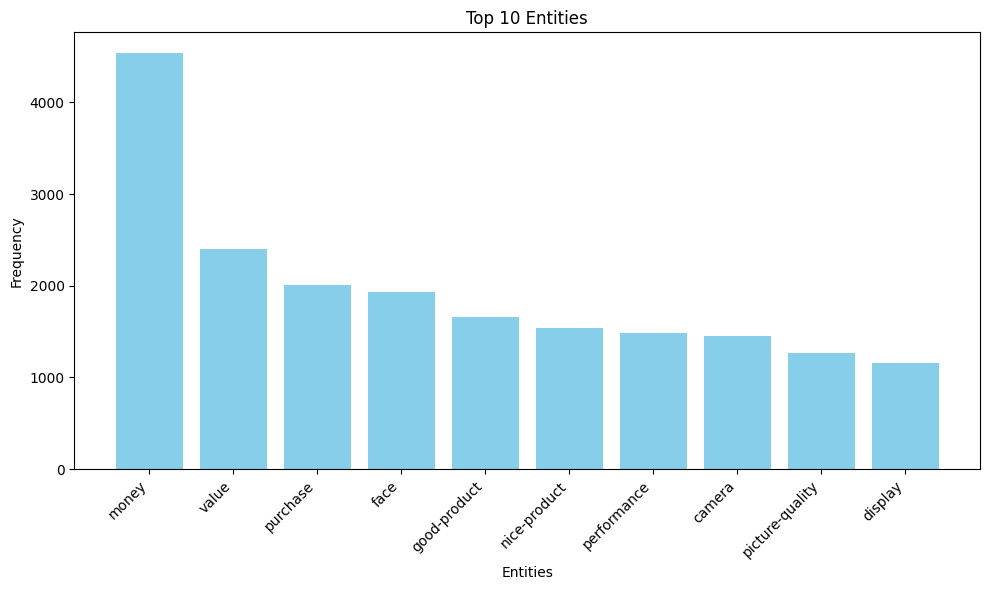

In [965]:
# ========================= Visualization: Bar Chart for Top 10 Entities =========================

# Create a bar chart for the top 10 entities
top_entities = entity_counts.most_common(10)
entities, counts = zip(*top_entities)
plt.figure(figsize=(10, 6))
plt.bar(entities, counts, color='skyblue')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.title('Top 10 Entities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

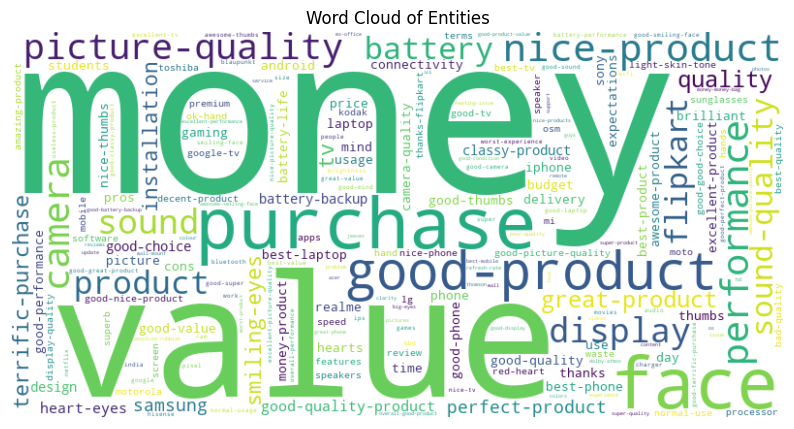

In [966]:
# ========================= Visualization: Word Cloud of Entities =========================

# Create a word cloud of entities
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(entity_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Entities')
plt.show()

In [967]:
# ========================= Token Flattening and Unique Extraction =========================
# Flatten the tokens without using split
flattened_tokens = [token for sublist in reviewData['CLEANED_TOKENS'] for token in sublist]

# Extract unique tokens
unique_tokens = sorted(set(flattened_tokens))

In [968]:
# ========================= Tokens Frequency Counting =========================
# Count the frequency of each entity
token_counts = Counter(flattened_tokens)

In [969]:
# ========================= Save Entities and Tokens to CSV Files =========================
# Save entities to a CSV file
entities_file = 'Entities_List.csv'
pd.DataFrame({'Entity': list(entity_counts.keys()), 'Count': list(entity_counts.values())}).to_csv(entities_file,
                                                                                                   index=False)
print(f"Entities saved to: {entities_file}")

# Save tokens to a CSV file with frequency counts
tokens_file = 'Tokens_List.csv'
pd.DataFrame({'Token': list(token_counts.keys()), 'Count': list(token_counts.values())}).to_csv(tokens_file,
                                                                                                index=False)
print(f"Tokens saved to: {tokens_file}")

Entities saved to: Entities_List.csv
Tokens saved to: Tokens_List.csv


In [970]:
# ========================= Entity Phrase Generation =========================
# Create entity phrases by joining entities
entity_phrases = [' '.join(entities) for entities in reviewData['CLEANED_ENTITIES']]

In [971]:
# ========================= TF-IDF Vectorization of Entity Phrases =========================
# Convert entities to TF-IDF embeddings
entity_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95, stop_words='english')

entity_vector = entity_vectorizer.fit_transform(entity_phrases)

#Check the structure of feature matrix
print("Shape of the Entity matrix:", entity_vector.shape)

Shape of the Entity matrix: (57058, 48)


In [972]:
# ========================= Tokens Phrase Generation =========================
# Create tokens phrases by joining entities
tokens_phrases = [' '.join(tokens) for tokens in reviewData['CLEANED_TOKENS']]

In [973]:
# ========================= TF-IDF Vectorization of Tokens Phrases =========================
# Convert tokens to TF-IDF embeddings
token_vectorizer = TfidfVectorizer(min_df=0.01, max_df=0.95, stop_words='english')
token_vector = token_vectorizer.fit_transform(tokens_phrases)

#Check the structure of feature matrix
print("Shape of the Token matrix:", token_vector.shape)

Shape of the Token matrix: (57058, 87)


In [974]:
# ========================= Combine TF-IDF and Entity Features =========================

# Combine TF-IDF and Entity features using sparse hstack
customer_feedback = hstack([entity_vector, token_vector])

# Check the new shape of the combined data
print(f"Combined data shape: {customer_feedback.shape}")

Combined data shape: (57058, 135)


<h2 align="center"> Feature Selection  </h2>

In [975]:
# =============================================
# Check for Empty Rows in Combined Sparse Matrix
# ==============================================

# Check for zero rows in the sparse matrix
empty_rows_combined = customer_feedback.sum(axis=1).A1 == 0  # A1 to flatten the result

# Count the number of empty rows
empty_row_count_combined = empty_rows_combined.sum()
print(f"Number of empty rows in combined data: {empty_row_count_combined}")

Number of empty rows in combined data: 398


In [976]:
# ==========================================
# Fill Empty Rows in Sparse Matrix with Zeros
# ===========================================

# Create a new matrix and fill the empty rows with zeros
filled_customer_feedback = lil_matrix(customer_feedback.shape)
filled_customer_feedback[~empty_rows_combined] = customer_feedback[~empty_rows_combined]

# Check the shape
print(f"Filled data shape: {filled_customer_feedback.shape}")

Filled data shape: (57058, 135)


In [977]:
# =============================================
# Scale Customer Feedback Data with MaxAbsScaler
# =============================================

# Use MaxAbsScaler to scale the data between 0 and 1

scaler = MaxAbsScaler()
customer_feedback_abs = scaler.fit_transform(customer_feedback)

In [978]:
# =====================================
# Apply SVD for Dimensionality Reduction
# =====================================

# Now apply SVD with the optimal number of components
svd = TruncatedSVD(n_components=50)
customer_feedback_svd = svd.fit_transform(customer_feedback_abs)

print(f"Shape after applying SVD: {customer_feedback_svd.shape}")

Shape after applying SVD: (57058, 50)


In [979]:
# =====================================
# Clip Negative Values for Non-Negativity
# =====================================

# Clip negative values to ensure non-negativity (if needed for LDA)
customer_feedback_svd_nonneg = np.clip(customer_feedback_svd, 0, None)

In [980]:
# =====================================
# Apply NMF to the Data
# =====================================

# Assuming `customer_feedback_abs` is a sparse matrix
nmf = NMF(n_components=50, init='random', random_state=42)
customer_feedback_nmf = nmf.fit_transform(customer_feedback_svd_nonneg)

print(f"Shape after applying NMF: {customer_feedback_nmf.shape}")

Shape after applying NMF: (57058, 50)


In [989]:
# =============================================
# Apply LDA for Topic Modeling with 5 Components
# =============================================

lda = LatentDirichletAllocation(n_components=5, random_state=42)
customer_feedback_lda = lda.fit_transform(customer_feedback_nmf)

In [990]:
# ========================================================
# Extract and Display Top Words for Each Topic in LDA Model
# ========================================================

# Get the top words for each topic
feature_names = entity_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11 - 1:-1]])) 

Topic #1:
brilliant amazing best excellent samsung nice backup display camera experience picture
Topic #2:
battery backup amazing installation mind flipkart laptop delivery decent camera display
Topic #3:
amazing camera excellent choice backup delivery eyes super display laptop use
Topic #4:
awesome amazing excellent installation backup face price camera flipkart experience mind
Topic #5:
amazing quality experience excellent heart classy great laptop camera choice brilliant


In [991]:
# =========================================================
# Assign Dominant Topic to Each Review Based on LDA Output
# ========================================================

reviewData['DOMINANT_TOPIC'] = customer_feedback_lda.argmax(axis=1)

<h2 align="center"> Train & Predict Model </h2>

In [992]:
# =====================================
# Train Random Forest Classifier
# =====================================

classifier = RandomForestClassifier()
classifier.fit(customer_feedback_nmf, y)

RandomForestClassifier()

In [993]:
# =====================================
# Predict Sentiment Using Random Forest
# =====================================

topic_sentiment_predictions = classifier.predict(customer_feedback_nmf)

<h2 align="center"> Sentiment Analysis </h2>

In [994]:
# ===================================================
# Group Reviews by Topic and Map Sentiment Predictions
# ===================================================

topic_reviews = reviewData.groupby('DOMINANT_TOPIC')['FEEDBACK_CLEANED'].apply(lambda x: " ".join(x))

topic_sentiment_mapping = dict(zip(topic_reviews.index, topic_sentiment_predictions))

In [995]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT,COMBINED_FEEDBACK,FEEDBACK_PARSED,FEEDBACK_CLEANED,CLEANED_TOKENS,CLEANED_ENTITIES,DOMINANT_TOPIC
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,neutral,Not as expected Just okay,not as expected just okay,not as expected just okay,[okay],[],4
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,positive,l overall good Must buy!,l overall good must buy,l overall good must buy,"[buy, overall-good]",[],3
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,positive,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...","good quality and 1080 pixel, q led, 8 gb memor...",good quality and pixel q led gb memory gb ram ...,"[ott-app, good-reliance-product, play-store-ap...","[store-app, 1.5-gb-ram, wifi, good-quality]",0
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,neutral,Sounds not good Fair,sounds not good fair,sounds not good fair,[good-fair],[],2
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative,Not good t Terrible product,not good t terrible product,not good t terrible product,"[terrible-product, good]",[],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive,No Review No Review,no review no review,no review no review,[review],[],4
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[],4
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive,No Review No Review,no review no review,no review no review,[review],[],4
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[],4


In [996]:
# =========================================
# Convert DOMINANT_TOPIC to Sentiment Labels
# =========================================

# Convert DOMINANT_TOPIC to sentiment labels
reviewData['SENTIMENT'] = reviewData['DOMINANT_TOPIC'].apply(convert_rating_to_sentiment)

In [997]:
# ===============================================
# Group by Date and Sentiment to Count Occurrences
# ===============================================

# Group by date and sentiment, counting the occurrences
sentiment_trends = reviewData.groupby([reviewData['CUSTOMER_REVIEW_DATE'].dt.to_period('M'), 'SENTIMENT']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

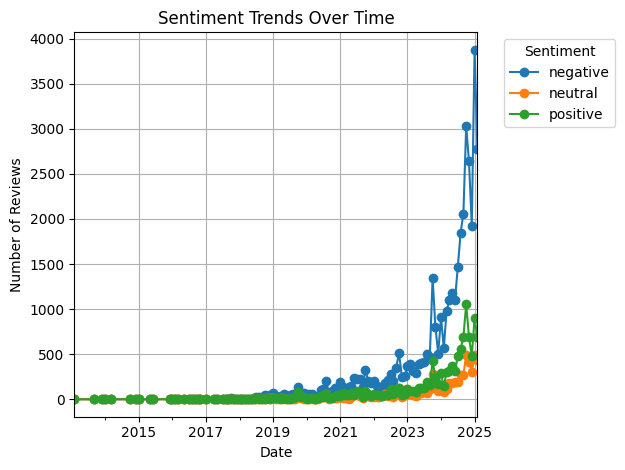

In [998]:
# =====================================
# Plot Sentiment Trends Over Time
# =====================================

# Plotting
plt.figure(figsize=(10, 6))
sentiment_trends.plot(kind='line', marker='o', title='Sentiment Trends Over Time')

plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [999]:
# =====================================
# Validate Customer Review Data
# =====================================

reviewData

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT,COMBINED_FEEDBACK,FEEDBACK_PARSED,FEEDBACK_CLEANED,CLEANED_TOKENS,CLEANED_ENTITIES,DOMINANT_TOPIC
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,positive,Not as expected Just okay,not as expected just okay,not as expected just okay,[okay],[],4
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,neutral,l overall good Must buy!,l overall good must buy,l overall good must buy,"[buy, overall-good]",[],3
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,negative,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...","good quality and 1080 pixel, q led, 8 gb memor...",good quality and pixel q led gb memory gb ram ...,"[ott-app, good-reliance-product, play-store-ap...","[store-app, 1.5-gb-ram, wifi, good-quality]",0
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,negative,Sounds not good Fair,sounds not good fair,sounds not good fair,[good-fair],[],2
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative,Not good t Terrible product,not good t terrible product,not good t terrible product,"[terrible-product, good]",[],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive,No Review No Review,no review no review,no review no review,[review],[],4
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[],4
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive,No Review No Review,no review no review,no review no review,[review],[],4
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[],4


In [1000]:
# =====================================
# Create Copy for Sentiment Count
# =====================================

sentiment_cnt = reviewData.copy()

In [1001]:
# =====================================
# Count Sentiment Occurrences Per Product
# =====================================

# Count sentiment occurrences per product
total_reviews = reviewData.groupby('PRODUCT_ID')['SENTIMENT'].count()

In [1002]:
# =====================================
# Validate Sentiment Data
# =====================================

sentiment_cnt

,PRODUCT_ID,CUSTOMER_NAME,CUSTOMER_RATING,CUSTOMER_SUMMARY,CUSTOMER_FEEDBACK,CUSTOMER_LOCATION,CUSTOMER_REVIEW_DATE,FINAL_RATING,SENTIMENT,COMBINED_FEEDBACK,FEEDBACK_PARSED,FEEDBACK_CLEANED,CLEANED_TOKENS,CLEANED_ENTITIES,DOMINANT_TOPIC
0,3,pardeep kudyar,3.0,Just okay,Not as expected,Jammu,2025-01-21 11:36:52.886048,3.0,positive,Not as expected Just okay,not as expected just okay,not as expected just okay,[okay],[],4
1,3,Suresh G Yadav,5.0,Must buy!,l overall good,Surat,2025-01-21 11:36:52.886048,5.0,neutral,l overall good Must buy!,l overall good must buy,l overall good must buy,"[buy, overall-good]",[],3
2,3,RAJA R,5.0,Worth every penny,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...",Srivilliputhur,2025-02-05 11:36:52.886048,5.0,negative,"Good Quality and 1080 Pixel, Q Led, 8GB Memory...","good quality and 1080 pixel, q led, 8 gb memor...",good quality and pixel q led gb memory gb ram ...,"[ott-app, good-reliance-product, play-store-ap...","[store-app, 1.5-gb-ram, wifi, good-quality]",0
3,3,Venkatesh S,3.0,Fair,Sounds not good,Mysuru,2025-01-30 11:36:52.886048,3.0,negative,Sounds not good Fair,sounds not good fair,sounds not good fair,[good-fair],[],2
4,3,Jagan Manne,1.0,Terrible product,Not good t,Dhone,2025-01-21 11:36:52.886048,1.0,negative,Not good t Terrible product,not good t terrible product,not good t terrible product,"[terrible-product, good]",[],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,2581,NaN,NaN,No Review,No Review,NaN,NaT,4.4,positive,No Review No Review,no review no review,no review no review,[review],[],4
2479,2584,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[],4
2481,2586,NaN,NaN,No Review,No Review,NaN,NaT,4.1,positive,No Review No Review,no review no review,no review no review,[review],[],4
2483,2588,NaN,NaN,No Review,No Review,NaN,NaT,4.3,positive,No Review No Review,no review no review,no review no review,[review],[],4


In [1003]:
# =====================================
# Count Sentiment Occurrences Per Product
# =====================================

# Count sentiment occurrences per product
sentiment_cnt = reviewData.groupby(['PRODUCT_ID', 'SENTIMENT']).size().unstack(fill_value=0)

In [1004]:
# =====================================
# Ensure All Sentiment Categories Exist
# =====================================

# Ensure all sentiment categories exist
for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment not in sentiment_cnt:
        sentiment_cnt[sentiment] = 0

In [1005]:
# =====================================
# Add Total Reviews Column
# =====================================

sentiment_cnt['TOTAL_REVIEWS'] = total_reviews

In [1048]:
# =====================================
# Calculate Positive Sentiment Proportion
# =====================================

sentiment_cnt['POSITIVE_PROPORTION'] = sentiment_cnt['positive'] / sentiment_cnt['TOTAL_REVIEWS']
sentiment_cnt['NEGATIVE_PROPORTION'] = sentiment_cnt['negative'] / sentiment_cnt['TOTAL_REVIEWS']
sentiment_cnt['NEUTRAL_PROPORTION'] = sentiment_cnt['neutral'] / sentiment_cnt['TOTAL_REVIEWS']

In [1049]:
# =====================================
# Filter Products with More Than 5 Review
# =====================================

sentiment_cnt = sentiment_cnt[sentiment_cnt['TOTAL_REVIEWS'] > 5]

In [1050]:
# =====================================
# Validate Sentiment Data
# =====================================

sentiment_cnt

SENTIMENT,level_0,index,PRODUCT_ID,negative,neutral,positive,TOTAL_REVIEWS,POSITIVE_PROPORTION,PRODUCT_NAME,SELLER_NAME,NEGATIVE_PROPORTION,NEUTRAL_PROPORTION
0,0,583,1093,3,0,5,8,0.625000,TAPARIA GGL30C Manual Pump (300 g Pack of 1),HakimiAgencies,0.375000,0.000000
1,1,1151,2218,4,0,5,9,0.555556,Acer Swift Go 14 TouchScreen AI PC Intel Core ...,SVPeripherals,0.444444,0.000000
2,2,900,1735,3,0,3,6,0.500000,SAMSUNG 80 cm (32 inch) HD Ready LED TV 2024 E...,IWQNBecommerce,0.500000,0.000000
5,4,969,1858,8,0,8,16,0.500000,Thomson NEO Core Series Intel Core i3 12th Gen...,RetailNet,0.500000,0.000000
3,5,1271,2466,4,0,4,8,0.500000,EASTMAN E-2218_12 Eastman T-Handle Socket Wren...,EVYTAA,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1307,1326,1003,1926,5,1,0,6,0.000000,DELL Vostro Intel Core i5 12th Gen 1240P - (16...,DealAuthentic,0.833333,0.166667
1308,1327,1264,2452,4,2,0,6,0.000000,BPL 109 cm (43 inch) Full HD LED Smart Android...,GrandGadgetStore,0.666667,0.333333
1309,1328,145,279,11,0,0,11,0.000000,JKVT ENTERPRISE Ice cube tray Multicolor Plast...,FostivaTrendz,1.000000,0.000000
1310,1329,468,897,6,0,0,6,0.000000,T-Series 60 cm (24 inch) HD Ready LED TV (TX24K),T-Series,1.000000,0.000000


In [1051]:
# =============================================
# Map Product and Seller Names to Sentiment Data
# ==============================================

# Create dictionaries to map PRODUCT_ID to PRODUCT_NAME and SELLER_NAME
product_name_map = productData.set_index('PRODUCT_ID')['PRODUCT_NAME'].to_dict()
seller_name_map = productData.set_index('PRODUCT_ID')['SELLER_NAME'].to_dict()

# Map the columns to sentiment_cnt
sentiment_cnt['PRODUCT_NAME'] = sentiment_cnt['PRODUCT_ID'].map(product_name_map)
sentiment_cnt['SELLER_NAME'] = sentiment_cnt['PRODUCT_ID'].map(seller_name_map)

In [1052]:
# =====================================
# Sort Products by Proportion of Positive Reviews
# =====================================

# Sort by proportion of positive reviews
sentiment_cnt = sentiment_cnt.sort_values(by='POSITIVE_PROPORTION', ascending=False)

In [1053]:
# =====================================
# Validate Sentiment Data
# =====================================

sentiment_cnt

SENTIMENT,level_0,index,PRODUCT_ID,negative,neutral,positive,TOTAL_REVIEWS,POSITIVE_PROPORTION,PRODUCT_NAME,SELLER_NAME,NEGATIVE_PROPORTION,NEUTRAL_PROPORTION
0,0,583,1093,3,0,5,8,0.625000,TAPARIA GGL30C Manual Pump (300 g Pack of 1),HakimiAgencies,0.375000,0.000000
1,1,1151,2218,4,0,5,9,0.555556,Acer Swift Go 14 TouchScreen AI PC Intel Core ...,SVPeripherals,0.444444,0.000000
2,2,900,1735,3,0,3,6,0.500000,SAMSUNG 80 cm (32 inch) HD Ready LED TV 2024 E...,IWQNBecommerce,0.500000,0.000000
4,3,351,666,8,0,8,16,0.500000,Thomson NEO Core Series Intel Core i3 12th Gen...,Ezig,0.500000,0.000000
5,4,969,1858,8,0,8,16,0.500000,Thomson NEO Core Series Intel Core i3 12th Gen...,RetailNet,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1326,1304,787,1494,24,1,0,25,0.000000,Signamio Pizza Cutter Sandwich Paratha Slicer ...,SIGNAMIO,0.960000,0.040000
1327,1305,618,1147,6,2,0,8,0.000000,TAPARIA 1101-6-HD Diagonal Plier (Length : 6 ...,HakimiAgencies,0.750000,0.250000
1328,1306,1152,2219,6,0,0,6,0.000000,T-Series 60 cm (24 inch) HD Ready LED TV (TX24K),T-Series,1.000000,0.000000
1329,1307,808,1533,8,1,0,9,0.000000,Rosebee Plastic Chopping Board/Cutting Pad for...,ROSEBEE,0.888889,0.111111


<h2 align="center"> Identifying Top Performing products for Recommendation </h2>

In [1054]:
# =====================================
# Get Top 10 Products by Positive Review Proportion
# =====================================

top_products = sentiment_cnt.sort_values(by='POSITIVE_PROPORTION', ascending=False).head(10)

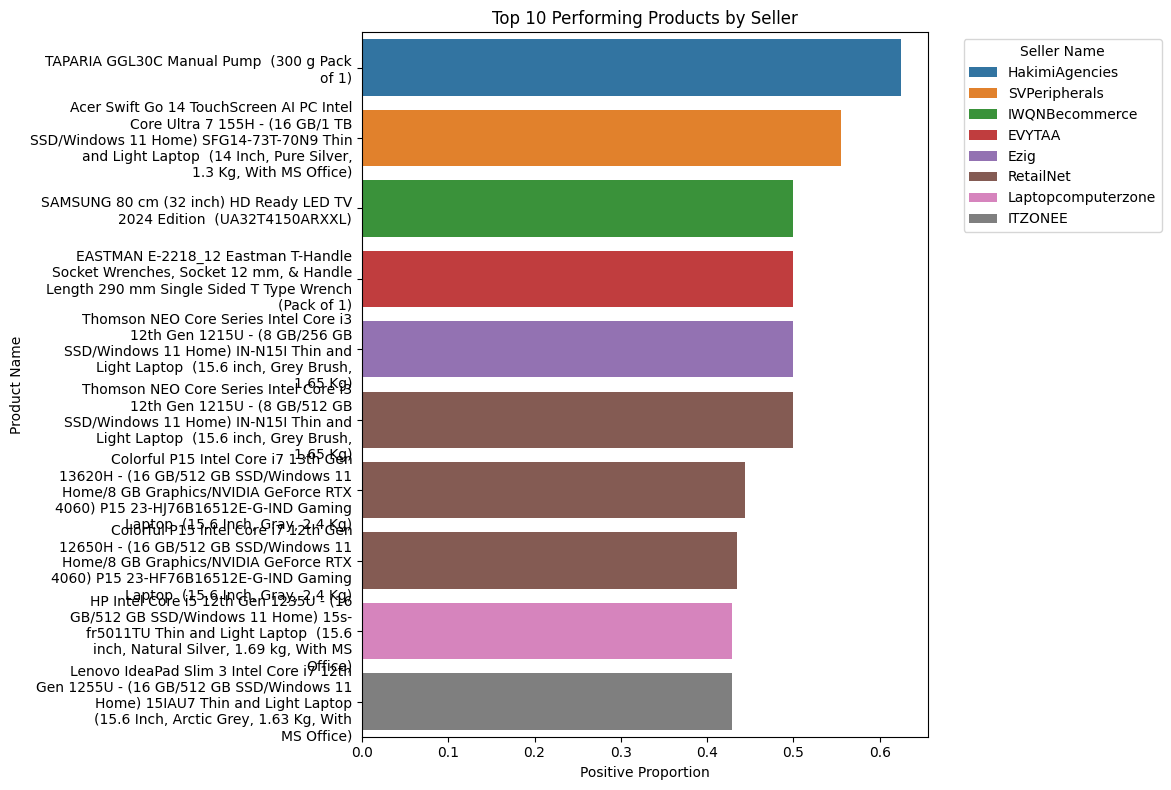

In [1055]:
# =============================================================
# Visualizing the Top 10 Products by Positive Review Proportion
# =============================================================

# Function to wrap long product names continuously
def wrap_labels(labels, max_len=50):
    return [textwrap.fill(label, width=max_len) for label in labels]

# Plotting the top 10 products
plt.figure(figsize=(12, 8))
sns.barplot(x='POSITIVE_PROPORTION', y='PRODUCT_NAME', data=top_products, hue='SELLER_NAME', dodge=False)
plt.title('Top 10 Performing Products by Seller')
plt.xlabel('Positive Proportion')
plt.ylabel('Product Name')

# Wrapping the product names
plt.yticks(ticks=plt.gca().get_yticks(), labels=wrap_labels(top_products['PRODUCT_NAME'], max_len=40))

plt.legend(title='Seller Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [1056]:
# ===============================
# Sentiment Score Calculation
# ===============================

sentiment_cnt['SENTIMENT_SCORE'] = (
    sentiment_cnt['POSITIVE_PROPORTION'] * 1 - 
    sentiment_cnt['NEGATIVE_PROPORTION'] * 1 + 
    sentiment_cnt['NEUTRAL_PROPORTION'] * 0.5
)

In [1057]:
# ===============================
# Feature Scaling with MinMaxScaler
# ===============================

scaler = MinMaxScaler()
sentiment_cnt[['POSITIVE_PROPORTION', 'NEGATIVE_PROPORTION', 'NEUTRAL_PROPORTION']] = scaler.fit_transform(
    sentiment_cnt[['POSITIVE_PROPORTION', 'NEGATIVE_PROPORTION', 'NEUTRAL_PROPORTION']])


In [1058]:
# ===========================================
# Clustering Sentiment Proportions with KMeans
# ============================================

# Use sentiment proportions as features
X = sentiment_cnt[['POSITIVE_PROPORTION', 'NEGATIVE_PROPORTION', 'NEUTRAL_PROPORTION']]
kmeans = KMeans(n_clusters=3)
sentiment_cnt['Cluster'] = kmeans.fit_predict(X)


In [1059]:
# ====================================
# Calculate Relative Positive Sentiment
# =====================================

avg_positive = sentiment_cnt['POSITIVE_PROPORTION'].mean()
sentiment_cnt['RELATIVE_POSITIVE'] = sentiment_cnt['POSITIVE_PROPORTION'] - avg_positive

In [1070]:
# =====================================================
# Categorize Performance Based on Sentiment Proportions
# ======================================================
sentiment_cnt['PERFORMANCE'] = 'Underperforming'
sentiment_cnt.loc[(sentiment_cnt['POSITIVE_PROPORTION'] > 0.7) & (sentiment_cnt['NEGATIVE_PROPORTION'] < 0.3), 'PERFORMANCE'] = 'Top Performing'

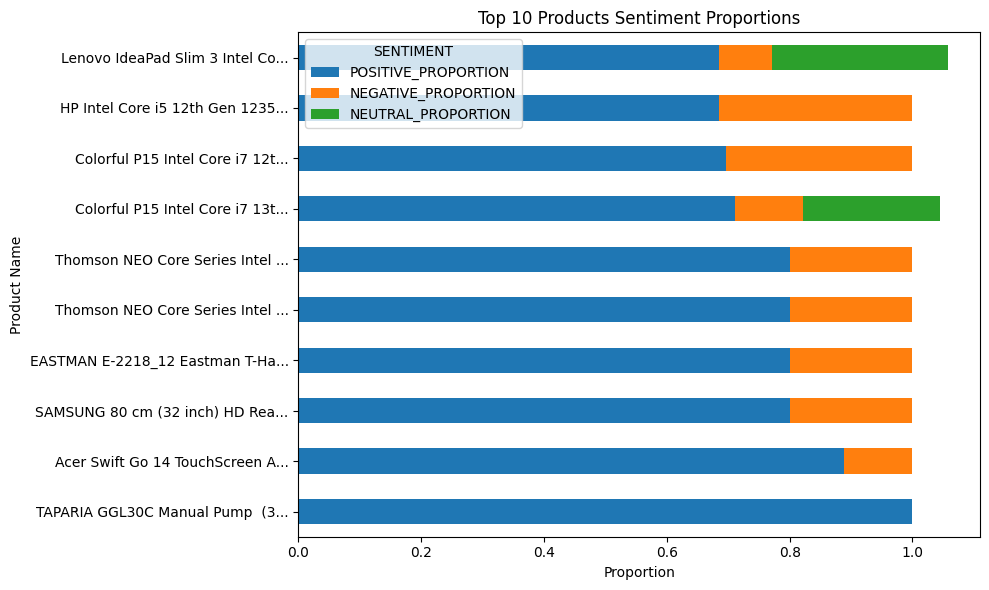

In [1068]:
# =============================================
# Plot Sentiment Proportions for Top 10 Products
# ==============================================

# Function to wrap long product names continuously
def truncate_labels(labels, max_len=30):
    return [label[:max_len] + "..." if len(label) > max_len else label for label in labels]

# Plot sentiment proportions for top 10 products
top_10_products = sentiment_cnt.sort_values(by='POSITIVE_PROPORTION', ascending=False).head(10)

# Wrap the product names
top_10_products['PRODUCT_NAME_WRAPPED'] = truncate_labels(top_10_products['PRODUCT_NAME'])

# Plot the sentiment proportions
ax = top_10_products[['PRODUCT_NAME_WRAPPED', 'POSITIVE_PROPORTION', 'NEGATIVE_PROPORTION', 'NEUTRAL_PROPORTION']].plot(
    kind='barh', stacked=True, figsize=(10, 6))  # Using horizontal bars

# Set custom labels for the y-axis (product names)
ax.set_yticklabels(top_10_products['PRODUCT_NAME_WRAPPED'])

# Customize plot
plt.title("Top 10 Products Sentiment Proportions")
plt.xlabel("Proportion")
plt.ylabel("Product Name")
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()